# Análise Raw Social Media User Analysis ETL

Esse arquivo contem a análise dos dados brutos.A pergunta principal do nosso trabalho é **Quais características demográficas e de comportamento predizem um maior clique em anúncios?**


In [102]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### Tabela 1: Amostra do dados

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_theme(context="notebook", style="whitegrid")
pd.set_option('display.max_columns', None)
df_raw = pd.read_csv('./data_raw.csv')
df_raw

### Tabela 2: Identificação dos Outliers

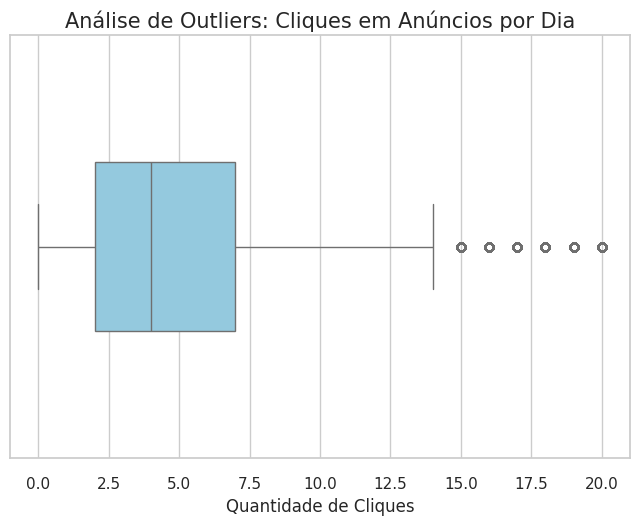

In [10]:
sns.boxplot(x=df_raw['ads_clicked_per_day'], color="skyblue", width=0.4)

plt.title('Análise de Outliers: Cliques em Anúncios por Dia', fontsize=15)
plt.xlabel('Quantidade de Cliques')
plt.show()

### Verificação de tabelas nulas

In [13]:
df_raw.isna().any().any() 

np.False_

### Gráfico de dispersão com relação entre idade e cliques em Anúncios

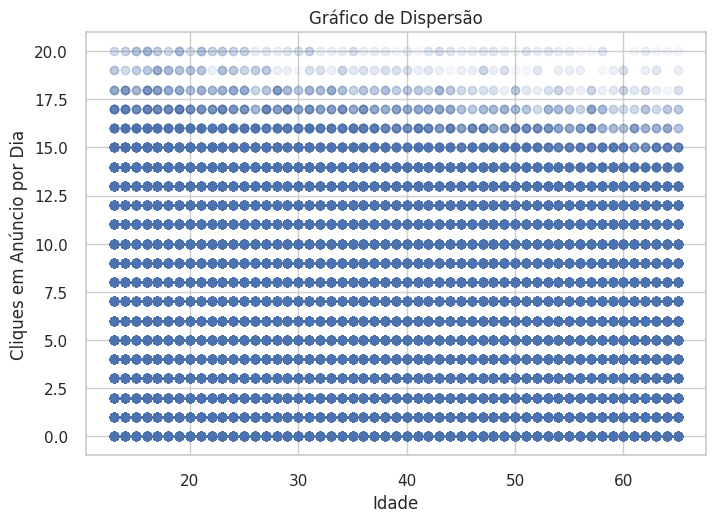

In [29]:
plt.scatter(df_raw["age"], df_raw["ads_clicked_per_day"], alpha=0.05)

plt.title("Gráfico de Dispersão")
plt.xlabel("Idade")
plt.ylabel("Cliques em Anúncio por Dia")
plt.show()

### Matriz de Correlação

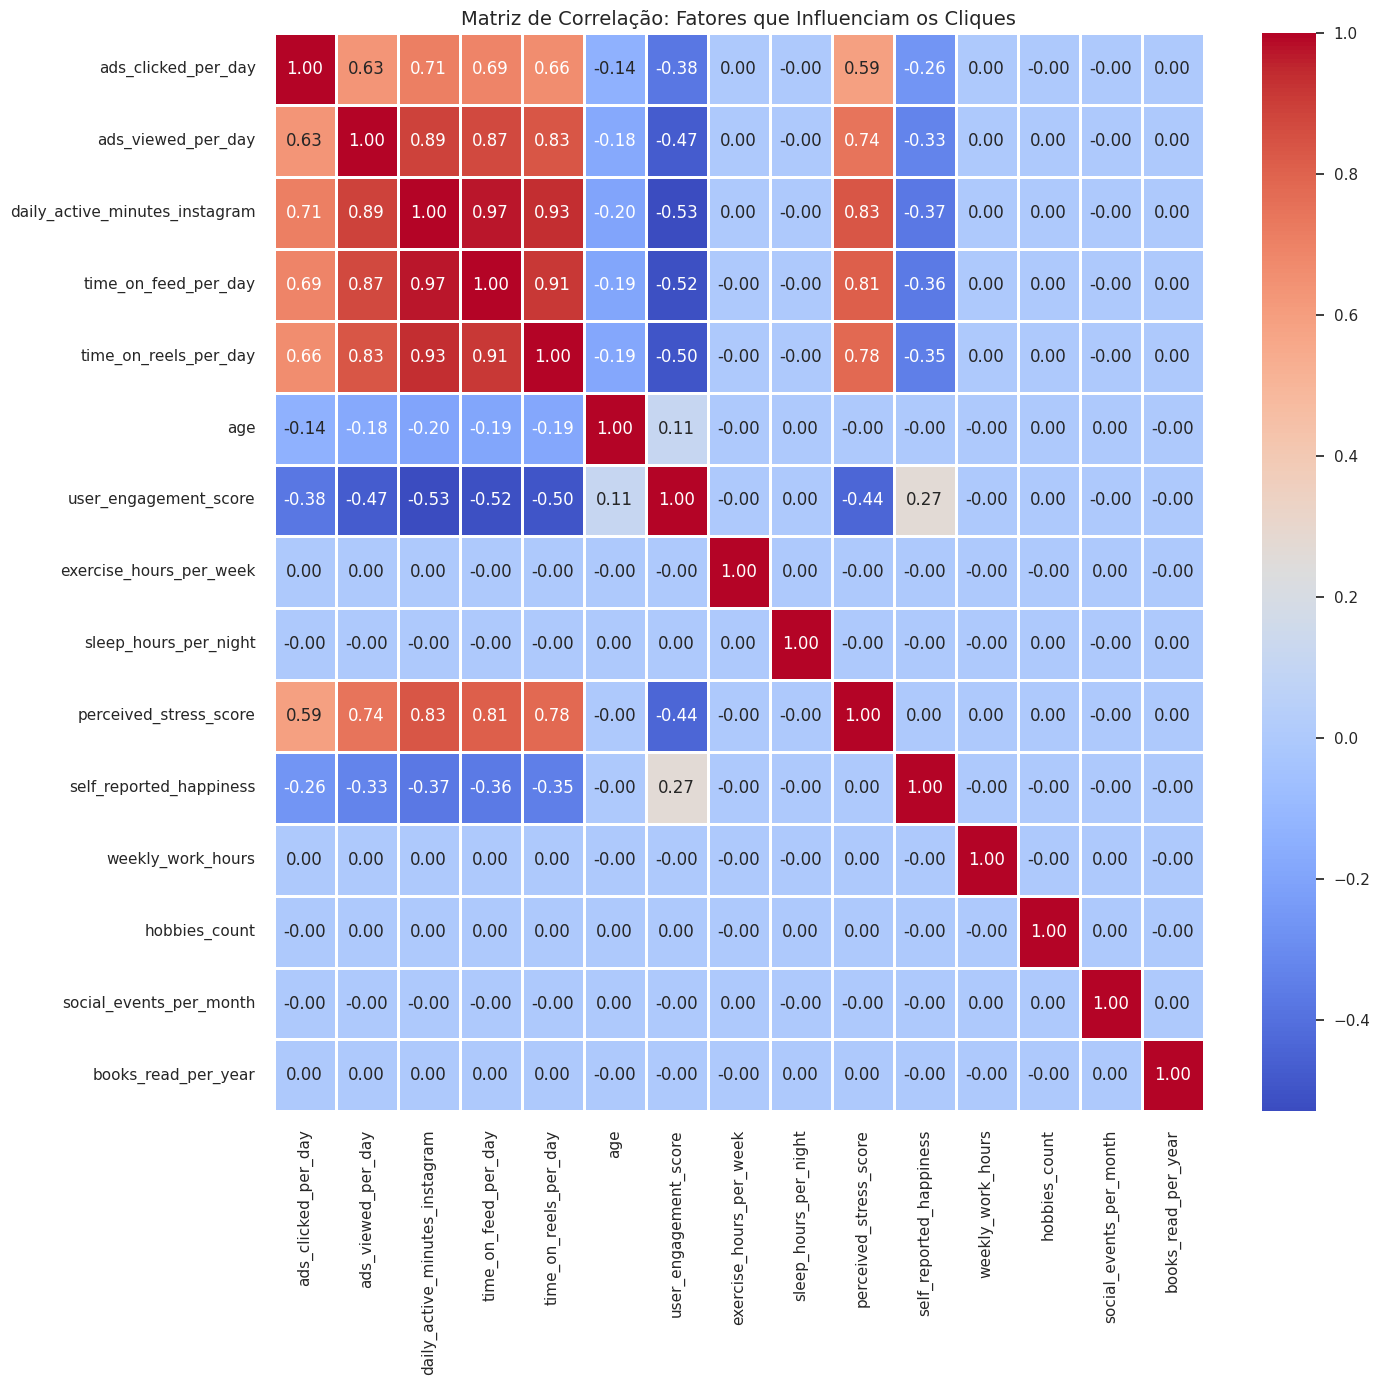

In [99]:
plt.figure(figsize=(15, 14))
cols_foco = [
    'ads_clicked_per_day', 'ads_viewed_per_day', 
    'daily_active_minutes_instagram', 'time_on_feed_per_day', 
    'time_on_reels_per_day', 'age', 'user_engagement_score','exercise_hours_per_week',
    'sleep_hours_per_night', 'perceived_stress_score', 'self_reported_happiness', 'weekly_work_hours',
    'hobbies_count', 'social_events_per_month', 'books_read_per_year',
]
corr_matrix = df_raw[cols_foco].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.8)

plt.title('Matriz de Correlação: Fatores que Influenciam os Cliques', fontsize=14)
plt.show()

Homens: 4.766781176286955
 Mulheres: 4.764278512264302
 Não binários: 4.766971166334748



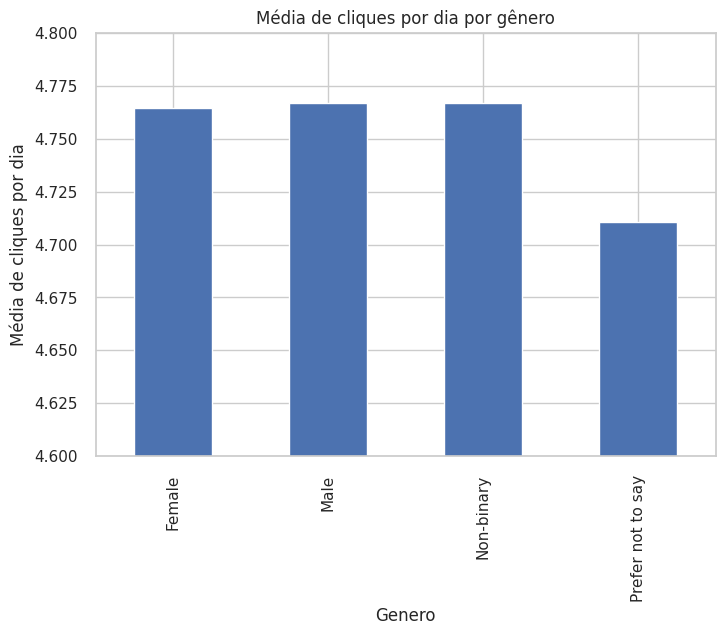

In [92]:
media_homens = df_raw[df_raw["gender"] == "Male"]["ads_clicked_per_day"].mean()
media_mulheres = df_raw[df_raw["gender"] == "Female"]["ads_clicked_per_day"].mean()
media_nonbinary = df_raw[df_raw["gender"] == "Non-binary"]["ads_clicked_per_day"].mean()
print(
    f'Homens: {media_homens}\n',
    f'Mulheres: {media_mulheres}\n',
    f'Não binários: {media_nonbinary}\n',
)


medias = df_raw.groupby("gender")["ads_clicked_per_day"].mean()

medias.plot(kind="bar")
plt.ylabel("Média de cliques por dia")
plt.xlabel("Genero")
plt.title("Média de cliques por dia por gênero")
plt.ylim(4.6, 4.8)  # zoom no eixo Y
plt.show()


5

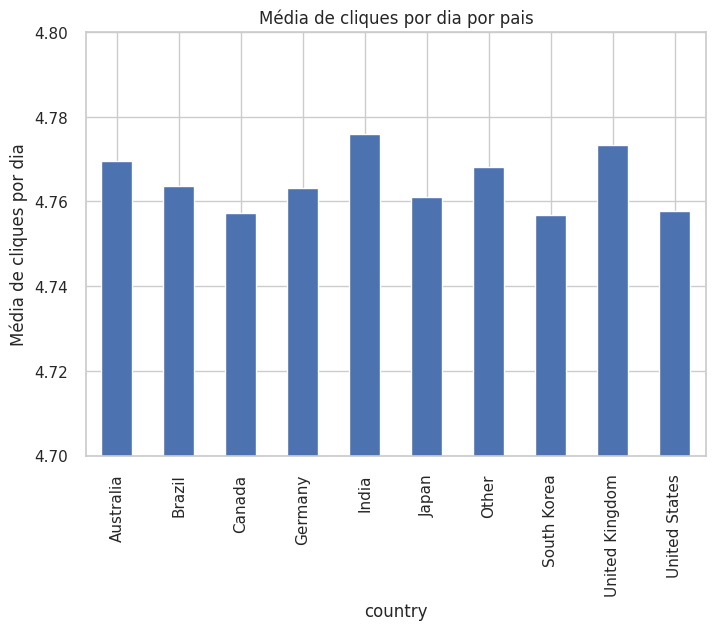

In [83]:
media_brazil = df_raw[df_raw["country"] == "Brazil"]["ads_clicked_per_day"].mean()

medias = df_raw.groupby("country")["ads_clicked_per_day"].mean()

medias.plot(kind="bar")
plt.ylabel("Média de cliques por dia")
plt.title("Média de cliques por dia por pais")
plt.ylim(4.7, 4.8)  # zoom no eixo Y
#plt.show()

#df_raw["country"].value_counts()

df_raw.head()
df_raw['income_level'].nunique()


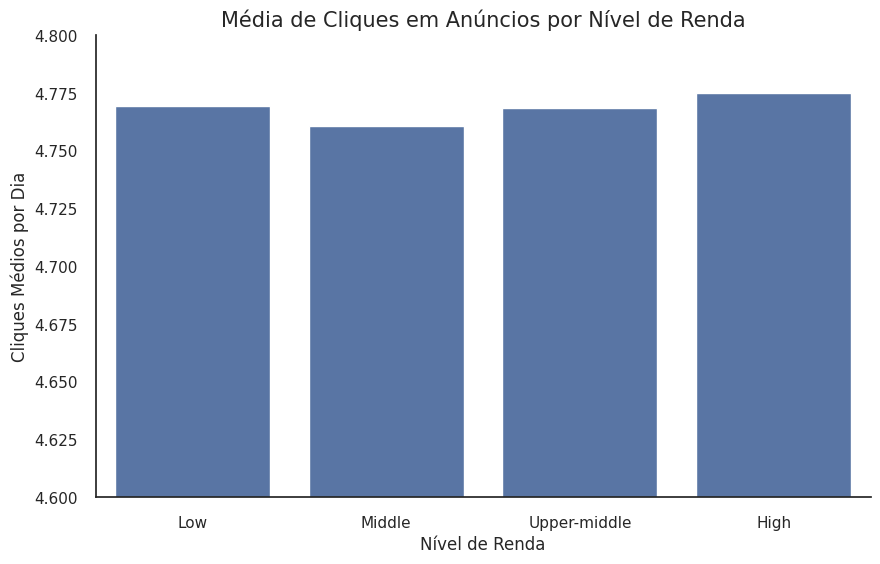

In [101]:
income_order = ['Low', 'Middle', 'Upper-middle', 'High']

sns.set_theme(style="white")
plt.figure(figsize=(10, 6))


ax = sns.barplot(
    data=df_raw, 
    x='income_level', 
    y='ads_clicked_per_day', 
    order=income_order, 
    errorbar=None 
)


sns.despine()

plt.title('Média de Cliques em Anúncios por Nível de Renda', fontsize=15)
plt.xlabel('Nível de Renda', fontsize=12)
plt.ylabel('Cliques Médios por Dia', fontsize=12)
plt.ylim(4.6, 4.8) 
plt.show()

In [63]:
features = [
    "daily_active_minutes_instagram",
    "sessions_per_day",
    "ads_viewed_per_day",
    "average_session_length_minutes"
]

X = df_raw[features]
y = df_raw["ads_clicked_per_day"]

model = LinearRegression()
model.fit(X, y)

coef_df = pd.DataFrame({
    "Variável": features,
    "Coeficiente": model.coef_
})

coef_df


,Variável,Coeficiente
0,daily_active_minutes_instagram,0.020078
1,sessions_per_day,-0.000476
2,ads_viewed_per_day,-0.000307
3,average_session_length_minutes,-0.000269


In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² (teste):", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² (teste): 0.5049057850234597
RMSE: 2.184309223468516


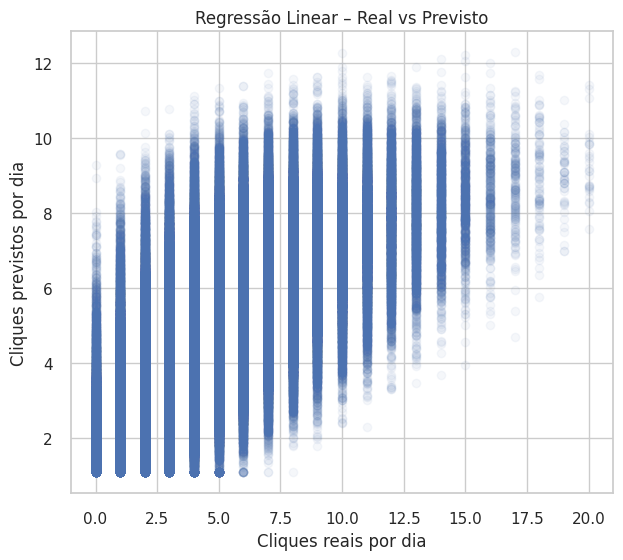

In [70]:
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.05)
plt.xlabel("Cliques reais por dia")
plt.ylabel("Cliques previstos por dia")
plt.title("Regressão Linear – Real vs Previsto")
plt.show()


Coeficiente: 0.020023394444535676
Intercepto: 0.9960171428300573
R²: 0.5045474347374579
RMSE: 2.185166105014477


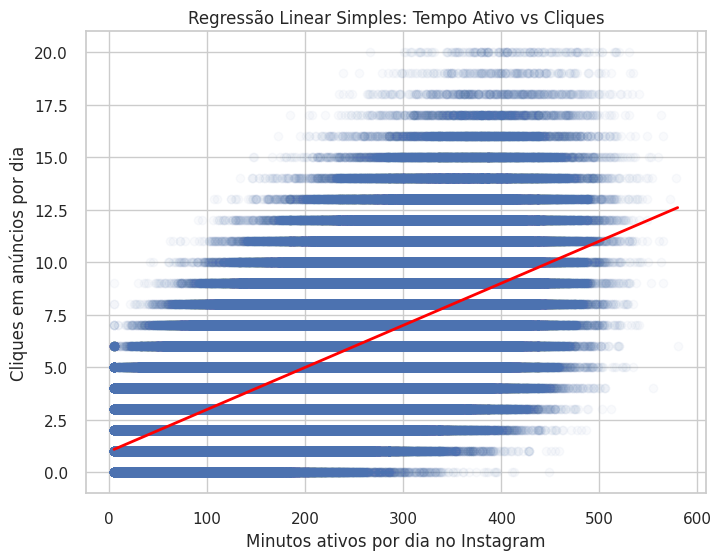

In [78]:
X = df_raw[["daily_active_minutes_instagram"]]
y = df_raw["ads_clicked_per_day"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Coeficiente:", model.coef_[0])
print("Intercepto:", model.intercept_)
print("R²:", r2_score(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))

plt.figure(figsize=(8,6))
plt.scatter(X, y, alpha=0.03)
x_line = pd.DataFrame(
    np.linspace(X.min().values[0], X.max().values[0], 100),
    columns=["daily_active_minutes_instagram"]
)

y_line = model.predict(x_line)
plt.plot(x_line, y_line, color="red", linewidth=2)
plt.xlabel("Minutos ativos por dia no Instagram")
plt.ylabel("Cliques em anúncios por dia")
plt.title("Regressão Linear Simples: Tempo Ativo vs Cliques")
plt.grid(True)
plt.show()